In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

The code below will take the JSON formatted data and assign bot labels to each account.

In [2]:
bots = pd.read_json("botwiki-2019_tweets.json")

user_dict = bots["user"].apply(dict)

user_dict.iloc[0]["id"]

dict_list = [user_dict[i] for i in range(len(user_dict))]

bots = pd.DataFrame(dict_list)

bots = bots["screen_name"].unique()

bots = pd.DataFrame(bots, columns = ["account"])

bots["type"] = "bot"

bots

,account,type
0,goth_lyrics,bot
1,transitingnow,bot
2,TheRiddlerBot,bot
3,tiny_seas,bot
4,wordfindatron,bot
...,...,...
693,nonogram_bot,bot
694,clitoscope,bot
695,TinyDungeons,bot
696,BotConnectFour,bot


Similar cleaning process here, this one assigns labels to real accounts.

In [3]:
real = pd.read_json("verified-2019_tweets.json")

user_dict = real["user"].apply(dict)

user_dict.iloc[0]["id"]

dict_list = [user_dict[i] for i in range(len(user_dict))]

real = pd.DataFrame(dict_list)

real = real["screen_name"].unique()

real = pd.DataFrame(real, columns = ["account"])

real["type"] = "real"

real

,account,type
0,Netwerk24,real
1,wbir,real
2,PatriciaMazzei,real
3,Jeffskowron,real
4,HeatherFCN,real
...,...,...
1982,TireDiscounters,real
1983,eillieanzi,real
1984,debrabirnbaum,real
1985,aiww,real


In [4]:
df = pd.concat([real, bots]) # merging data sets together

In [1]:
df = df.sample(100) # using a smaller experimental sample

NameError: name 'df' is not defined

We'll use a countplot to view the distribution of labels in our data.

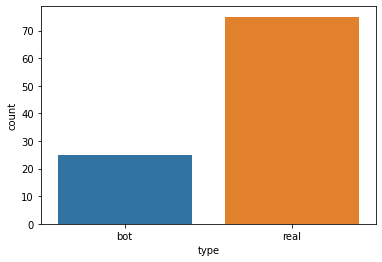

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=df["type"])

In [7]:
import twint 
import nest_asyncio
nest_asyncio.apply()

In [8]:
users = list(df["account"])

Using the module Twint, we'll get all the Tweets for each user in our data set.  The code below scrapes all Tweets back to January 1st, 2019.

In [9]:
for user in users[9:]:
    c = twint.Config()
    c.Username = user
    c.Debug = True
#     c.Resume = "test_1.session"
    c.Since = '2019-01-01 00:00:00'
    c.Store_csv = True
    c.Output = f"accounts/{user}.csv"
    twint.run.Search(c)

In [10]:
import glob

In [11]:
files = glob.glob("accounts/*") 

Since each account's Tweets were compiled to individual data sets, we'll need to merge them together below.

In [12]:
dfs = [pd.read_csv(file) for file in files]

C:\Users\jpzam\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3263: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [13]:
df = pd.concat(dfs)

In [14]:
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1280277647378075648,1280277647378075648,1594076952000,2020-07-06,19:09:12,Eastern Daylight Time,771388593130483712,11thhour,11th Hour,NaN,Is Trump relying on a flawed re-election strat...,[],['https://nbcnews.to/31PGBJG'],['https://pbs.twimg.com/media/EcR1s2wX0AMPe0L....,7,8,27,['#11thhour'],[],https://twitter.com/11thHour/status/1280277647...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '771388593130483712', 'username':...",NaN,NaN,NaN,NaN
1,1279127771818504193,1279127771818504193,1593802800000,2020-07-03,15:00:00,Eastern Daylight Time,771388593130483712,11thhour,11th Hour,NaN,The polls showing Biden beating Trump badly ar...,[],['https://on.msnbc.com/2D4XjKS'],['https://pbs.twimg.com/media/Eb-iGlZWsAcbbZh....,8,19,75,['#11thhour'],[],https://twitter.com/11thHour/status/1279127771...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '771388593130483712', 'username':...",NaN,NaN,NaN,NaN
2,1279112674257719296,1279112674257719296,1593799200000,2020-07-03,14:00:00,Eastern Daylight Time,771388593130483712,11thhour,11th Hour,NaN,Why are some governors still ignoring the advi...,[],['https://on.msnbc.com/2C6bYET'],['https://pbs.twimg.com/media/Eb-guG_WoAExe98....,0,5,11,['#11thhour'],[],https://twitter.com/11thHour/status/1279112674...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '771388593130483712', 'username':...",NaN,NaN,NaN,NaN
3,1279097574306136066,1279097574306136066,1593795600000,2020-07-03,13:00:00,Eastern Daylight Time,771388593130483712,11thhour,11th Hour,NaN,Trump is focusing on re-election instead of th...,[],['https://on.msnbc.com/3eX43bw'],['https://pbs.twimg.com/media/Eb-fnaTWsAINFSQ....,3,21,28,['#11thhour'],[],https://twitter.com/11thHour/status/1279097574...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '771388593130483712', 'username':...",NaN,NaN,NaN,NaN
4,1279082473809309697,1279082473809309697,1593792000000,2020-07-03,12:00:00,Eastern Daylight Time,771388593130483712,11thhour,11th Hour,NaN,"Trump says the #coronavirus pandemic is ""being...",[],['https://on.msnbc.com/31GL4yi'],['https://pbs.twimg.com/media/Eb-ctc-XQAEoSys....,10,6,19,"['#coronavirus', '#11thhour']",[],https://twitter.com/11thHour/status/1279082473...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '771388593130483712', 'username':...",NaN,NaN,NaN,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446002 entries, 0 to 2099
Data columns (total 34 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               446002 non-null  int64  
 1   conversation_id  446002 non-null  int64  
 2   created_at       446002 non-null  int64  
 3   date             446002 non-null  object 
 4   time             446002 non-null  object 
 5   timezone         446002 non-null  object 
 6   user_id          446002 non-null  int64  
 7   username         446002 non-null  object 
 8   name             446002 non-null  object 
 9   place            238 non-null     object 
 10  tweet            446002 non-null  object 
 11  mentions         446002 non-null  object 
 12  urls             446002 non-null  object 
 13  photos           446002 non-null  object 
 14  replies_count    446002 non-null  int64  
 15  retweets_count   446002 non-null  int64  
 16  likes_count      446002 non-null  int64 

In [16]:
df.describe()

,id,conversation_id,created_at,user_id,replies_count,retweets_count,likes_count,video,near,geo,source,user_rt_id,user_rt,retweet_id,retweet_date,translate,trans_src,trans_dest
count,4.460020e+05,4.460020e+05,4.460020e+05,4.460020e+05,446002.000000,446002.000000,446002.000000,446002.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.181164e+18,1.181086e+18,1.570446e+12,1.685207e+17,3.255752,9.943740,53.626627,0.022753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5.876129e+16,5.891820e+16,1.400978e+10,3.502806e+17,151.027034,194.038847,755.885837,0.149116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.079965e+18,4.060842e+17,1.546319e+12,1.117867e+07,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.129037e+18,1.129012e+18,1.558018e+12,2.403626e+07,0.000000,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.181989e+18,1.181953e+18,1.570643e+12,3.639109e+07,0.000000,1.000000,5.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.233089e+18,1.233067e+18,1.582826e+12,3.231782e+09,1.000000,4.000000,21.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.280329e+18,1.280329e+18,1.594089e+12,1.107378e+18,68414.000000,33150.000000,134727.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can use a heatmap to view missing values.  This will help us determine should remove the columns or perform other forms of imputation.

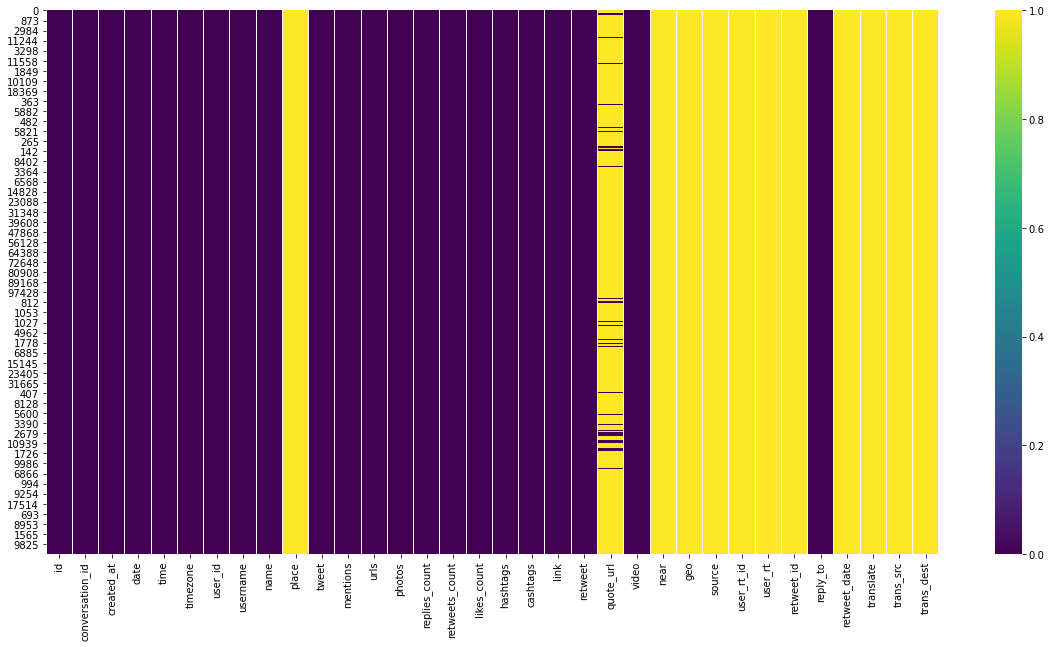

In [17]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.isna(), cmap='viridis')

In [18]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'video', 'near', 'geo',
       'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to',
       'retweet_date', 'translate', 'trans_src', 'trans_dest'],
      dtype='object')

Dropping the columns listed in the code block below due to a high volume of missing values.

In [19]:
drop_cols = "place quote_url near geo source user_rt_id user_rt retweet_id retweet_date translate trans_src trans_dest".split()

In [20]:
df.drop(drop_cols, axis=1, inplace=True)

In [2]:
sns.heatmap(df.isna(), cmap='viridis') # rechecking heatmap after dropping columns

NameError: name 'sns' is not defined

In [22]:
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,video,reply_to
0,1280277647378075648,1280277647378075648,1594076952000,2020-07-06,19:09:12,Eastern Daylight Time,771388593130483712,11thhour,11th Hour,Is Trump relying on a flawed re-election strat...,[],['https://nbcnews.to/31PGBJG'],['https://pbs.twimg.com/media/EcR1s2wX0AMPe0L....,7,8,27,['#11thhour'],[],https://twitter.com/11thHour/status/1280277647...,False,0,"[{'user_id': '771388593130483712', 'username':..."
1,1279127771818504193,1279127771818504193,1593802800000,2020-07-03,15:00:00,Eastern Daylight Time,771388593130483712,11thhour,11th Hour,The polls showing Biden beating Trump badly ar...,[],['https://on.msnbc.com/2D4XjKS'],['https://pbs.twimg.com/media/Eb-iGlZWsAcbbZh....,8,19,75,['#11thhour'],[],https://twitter.com/11thHour/status/1279127771...,False,0,"[{'user_id': '771388593130483712', 'username':..."
2,1279112674257719296,1279112674257719296,1593799200000,2020-07-03,14:00:00,Eastern Daylight Time,771388593130483712,11thhour,11th Hour,Why are some governors still ignoring the advi...,[],['https://on.msnbc.com/2C6bYET'],['https://pbs.twimg.com/media/Eb-guG_WoAExe98....,0,5,11,['#11thhour'],[],https://twitter.com/11thHour/status/1279112674...,False,0,"[{'user_id': '771388593130483712', 'username':..."
3,1279097574306136066,1279097574306136066,1593795600000,2020-07-03,13:00:00,Eastern Daylight Time,771388593130483712,11thhour,11th Hour,Trump is focusing on re-election instead of th...,[],['https://on.msnbc.com/3eX43bw'],['https://pbs.twimg.com/media/Eb-fnaTWsAINFSQ....,3,21,28,['#11thhour'],[],https://twitter.com/11thHour/status/1279097574...,False,0,"[{'user_id': '771388593130483712', 'username':..."
4,1279082473809309697,1279082473809309697,1593792000000,2020-07-03,12:00:00,Eastern Daylight Time,771388593130483712,11thhour,11th Hour,"Trump says the #coronavirus pandemic is ""being...",[],['https://on.msnbc.com/31GL4yi'],['https://pbs.twimg.com/media/Eb-ctc-XQAEoSys....,10,6,19,"['#coronavirus', '#11thhour']",[],https://twitter.com/11thHour/status/1279082473...,False,0,"[{'user_id': '771388593130483712', 'username':..."


In [23]:
df["cashtags"].unique()

array(['[]', "['$jnj']", "['$lyft']", "['$crim']", "['$ign']",
       "['$igns']", "['$not']", "['$ilk']", "['$hort']", "['$bcsm']",
       "['$carbon']", "['$djia']", "['$dji']"], dtype=object)

Dropping the `cashtags` column since they won't be needed for our model.

In [24]:
df.drop("cashtags", axis=1, inplace=True)

In [25]:
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,link,retweet,video,reply_to
0,1280277647378075648,1280277647378075648,1594076952000,2020-07-06,19:09:12,Eastern Daylight Time,771388593130483712,11thhour,11th Hour,Is Trump relying on a flawed re-election strat...,[],['https://nbcnews.to/31PGBJG'],['https://pbs.twimg.com/media/EcR1s2wX0AMPe0L....,7,8,27,['#11thhour'],https://twitter.com/11thHour/status/1280277647...,False,0,"[{'user_id': '771388593130483712', 'username':..."
1,1279127771818504193,1279127771818504193,1593802800000,2020-07-03,15:00:00,Eastern Daylight Time,771388593130483712,11thhour,11th Hour,The polls showing Biden beating Trump badly ar...,[],['https://on.msnbc.com/2D4XjKS'],['https://pbs.twimg.com/media/Eb-iGlZWsAcbbZh....,8,19,75,['#11thhour'],https://twitter.com/11thHour/status/1279127771...,False,0,"[{'user_id': '771388593130483712', 'username':..."
2,1279112674257719296,1279112674257719296,1593799200000,2020-07-03,14:00:00,Eastern Daylight Time,771388593130483712,11thhour,11th Hour,Why are some governors still ignoring the advi...,[],['https://on.msnbc.com/2C6bYET'],['https://pbs.twimg.com/media/Eb-guG_WoAExe98....,0,5,11,['#11thhour'],https://twitter.com/11thHour/status/1279112674...,False,0,"[{'user_id': '771388593130483712', 'username':..."
3,1279097574306136066,1279097574306136066,1593795600000,2020-07-03,13:00:00,Eastern Daylight Time,771388593130483712,11thhour,11th Hour,Trump is focusing on re-election instead of th...,[],['https://on.msnbc.com/3eX43bw'],['https://pbs.twimg.com/media/Eb-fnaTWsAINFSQ....,3,21,28,['#11thhour'],https://twitter.com/11thHour/status/1279097574...,False,0,"[{'user_id': '771388593130483712', 'username':..."
4,1279082473809309697,1279082473809309697,1593792000000,2020-07-03,12:00:00,Eastern Daylight Time,771388593130483712,11thhour,11th Hour,"Trump says the #coronavirus pandemic is ""being...",[],['https://on.msnbc.com/31GL4yi'],['https://pbs.twimg.com/media/Eb-ctc-XQAEoSys....,10,6,19,"['#coronavirus', '#11thhour']",https://twitter.com/11thHour/status/1279082473...,False,0,"[{'user_id': '771388593130483712', 'username':..."


In [26]:
df["mentions"].unique()

array(['[]', "['carolleonnig']", "['ashleyrparker']", ...,
       "['stage_ae', 'campgreensky']",
       "['mrsmallstheatre', 'gregoryaisakov']",
       "['kylewyep913', 'leonbridges']"], dtype=object)

We need to clean up the strings that returned from our Twint scrapes.

In [27]:
def mentions(text):
    if text == "[]":
        return 0
    else:
        return 1

In [28]:
df["mentions"] = df["mentions"].apply(mentions)

In [29]:
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,link,retweet,video,reply_to
0,1280277647378075648,1280277647378075648,1594076952000,2020-07-06,19:09:12,Eastern Daylight Time,771388593130483712,11thhour,11th Hour,Is Trump relying on a flawed re-election strat...,0,['https://nbcnews.to/31PGBJG'],['https://pbs.twimg.com/media/EcR1s2wX0AMPe0L....,7,8,27,['#11thhour'],https://twitter.com/11thHour/status/1280277647...,False,0,"[{'user_id': '771388593130483712', 'username':..."
1,1279127771818504193,1279127771818504193,1593802800000,2020-07-03,15:00:00,Eastern Daylight Time,771388593130483712,11thhour,11th Hour,The polls showing Biden beating Trump badly ar...,0,['https://on.msnbc.com/2D4XjKS'],['https://pbs.twimg.com/media/Eb-iGlZWsAcbbZh....,8,19,75,['#11thhour'],https://twitter.com/11thHour/status/1279127771...,False,0,"[{'user_id': '771388593130483712', 'username':..."
2,1279112674257719296,1279112674257719296,1593799200000,2020-07-03,14:00:00,Eastern Daylight Time,771388593130483712,11thhour,11th Hour,Why are some governors still ignoring the advi...,0,['https://on.msnbc.com/2C6bYET'],['https://pbs.twimg.com/media/Eb-guG_WoAExe98....,0,5,11,['#11thhour'],https://twitter.com/11thHour/status/1279112674...,False,0,"[{'user_id': '771388593130483712', 'username':..."
3,1279097574306136066,1279097574306136066,1593795600000,2020-07-03,13:00:00,Eastern Daylight Time,771388593130483712,11thhour,11th Hour,Trump is focusing on re-election instead of th...,0,['https://on.msnbc.com/3eX43bw'],['https://pbs.twimg.com/media/Eb-fnaTWsAINFSQ....,3,21,28,['#11thhour'],https://twitter.com/11thHour/status/1279097574...,False,0,"[{'user_id': '771388593130483712', 'username':..."
4,1279082473809309697,1279082473809309697,1593792000000,2020-07-03,12:00:00,Eastern Daylight Time,771388593130483712,11thhour,11th Hour,"Trump says the #coronavirus pandemic is ""being...",0,['https://on.msnbc.com/31GL4yi'],['https://pbs.twimg.com/media/Eb-ctc-XQAEoSys....,10,6,19,"['#coronavirus', '#11thhour']",https://twitter.com/11thHour/status/1279082473...,False,0,"[{'user_id': '771388593130483712', 'username':..."


In [30]:
def urls(url):
    if url:
        return 1
    else:
        return 0

In [31]:
df.drop("urls", axis=1, inplace=True)

In [32]:
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,mentions,photos,replies_count,retweets_count,likes_count,hashtags,link,retweet,video,reply_to
0,1280277647378075648,1280277647378075648,1594076952000,2020-07-06,19:09:12,Eastern Daylight Time,771388593130483712,11thhour,11th Hour,Is Trump relying on a flawed re-election strat...,0,['https://pbs.twimg.com/media/EcR1s2wX0AMPe0L....,7,8,27,['#11thhour'],https://twitter.com/11thHour/status/1280277647...,False,0,"[{'user_id': '771388593130483712', 'username':..."
1,1279127771818504193,1279127771818504193,1593802800000,2020-07-03,15:00:00,Eastern Daylight Time,771388593130483712,11thhour,11th Hour,The polls showing Biden beating Trump badly ar...,0,['https://pbs.twimg.com/media/Eb-iGlZWsAcbbZh....,8,19,75,['#11thhour'],https://twitter.com/11thHour/status/1279127771...,False,0,"[{'user_id': '771388593130483712', 'username':..."
2,1279112674257719296,1279112674257719296,1593799200000,2020-07-03,14:00:00,Eastern Daylight Time,771388593130483712,11thhour,11th Hour,Why are some governors still ignoring the advi...,0,['https://pbs.twimg.com/media/Eb-guG_WoAExe98....,0,5,11,['#11thhour'],https://twitter.com/11thHour/status/1279112674...,False,0,"[{'user_id': '771388593130483712', 'username':..."
3,1279097574306136066,1279097574306136066,1593795600000,2020-07-03,13:00:00,Eastern Daylight Time,771388593130483712,11thhour,11th Hour,Trump is focusing on re-election instead of th...,0,['https://pbs.twimg.com/media/Eb-fnaTWsAINFSQ....,3,21,28,['#11thhour'],https://twitter.com/11thHour/status/1279097574...,False,0,"[{'user_id': '771388593130483712', 'username':..."
4,1279082473809309697,1279082473809309697,1593792000000,2020-07-03,12:00:00,Eastern Daylight Time,771388593130483712,11thhour,11th Hour,"Trump says the #coronavirus pandemic is ""being...",0,['https://pbs.twimg.com/media/Eb-ctc-XQAEoSys....,10,6,19,"['#coronavirus', '#11thhour']",https://twitter.com/11thHour/status/1279082473...,False,0,"[{'user_id': '771388593130483712', 'username':..."


The function below will cleanup the hashtag entries.

In [33]:
def ht_cleaner(text):
    if "[]" in text:
        return text.replace("[]", "")
    elif "[" and "]" in text:
        return text.replace("[", "").replace("]", "")
    else:
        pass

In [34]:
df["hashtags"] = df["hashtags"].apply(ht_cleaner)

In [35]:
import re
def ht_counter(text):
    '''
    Uses REGEX to split hashtags for unique counting.
    '''
    pattern = re.compile("^'")
    match = re.search(pattern, text)
    if match:
        return len(text.split(","))
    else:
        return 0

In [36]:
df["hashtag_count"] = df["hashtags"].apply(ht_counter)

In [37]:
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,mentions,photos,replies_count,retweets_count,likes_count,hashtags,link,retweet,video,reply_to,hashtag_count
0,1280277647378075648,1280277647378075648,1594076952000,2020-07-06,19:09:12,Eastern Daylight Time,771388593130483712,11thhour,11th Hour,Is Trump relying on a flawed re-election strat...,0,['https://pbs.twimg.com/media/EcR1s2wX0AMPe0L....,7,8,27,'#11thhour',https://twitter.com/11thHour/status/1280277647...,False,0,"[{'user_id': '771388593130483712', 'username':...",1
1,1279127771818504193,1279127771818504193,1593802800000,2020-07-03,15:00:00,Eastern Daylight Time,771388593130483712,11thhour,11th Hour,The polls showing Biden beating Trump badly ar...,0,['https://pbs.twimg.com/media/Eb-iGlZWsAcbbZh....,8,19,75,'#11thhour',https://twitter.com/11thHour/status/1279127771...,False,0,"[{'user_id': '771388593130483712', 'username':...",1
2,1279112674257719296,1279112674257719296,1593799200000,2020-07-03,14:00:00,Eastern Daylight Time,771388593130483712,11thhour,11th Hour,Why are some governors still ignoring the advi...,0,['https://pbs.twimg.com/media/Eb-guG_WoAExe98....,0,5,11,'#11thhour',https://twitter.com/11thHour/status/1279112674...,False,0,"[{'user_id': '771388593130483712', 'username':...",1
3,1279097574306136066,1279097574306136066,1593795600000,2020-07-03,13:00:00,Eastern Daylight Time,771388593130483712,11thhour,11th Hour,Trump is focusing on re-election instead of th...,0,['https://pbs.twimg.com/media/Eb-fnaTWsAINFSQ....,3,21,28,'#11thhour',https://twitter.com/11thHour/status/1279097574...,False,0,"[{'user_id': '771388593130483712', 'username':...",1
4,1279082473809309697,1279082473809309697,1593792000000,2020-07-03,12:00:00,Eastern Daylight Time,771388593130483712,11thhour,11th Hour,"Trump says the #coronavirus pandemic is ""being...",0,['https://pbs.twimg.com/media/Eb-ctc-XQAEoSys....,10,6,19,"'#coronavirus', '#11thhour'",https://twitter.com/11thHour/status/1279082473...,False,0,"[{'user_id': '771388593130483712', 'username':...",2


In [38]:
" " in df["photos"]

False

In [39]:
to_drop = "id conversation_id created_at date time user_id photos hashtags link reply_to".split()

In [40]:
df.drop(to_drop, axis=1, inplace=True)

In [41]:
df.head()

,timezone,username,name,tweet,mentions,replies_count,retweets_count,likes_count,retweet,video,hashtag_count
0,Eastern Daylight Time,11thhour,11th Hour,Is Trump relying on a flawed re-election strat...,0,7,8,27,False,0,1
1,Eastern Daylight Time,11thhour,11th Hour,The polls showing Biden beating Trump badly ar...,0,8,19,75,False,0,1
2,Eastern Daylight Time,11thhour,11th Hour,Why are some governors still ignoring the advi...,0,0,5,11,False,0,1
3,Eastern Daylight Time,11thhour,11th Hour,Trump is focusing on re-election instead of th...,0,3,21,28,False,0,1
4,Eastern Daylight Time,11thhour,11th Hour,"Trump says the #coronavirus pandemic is ""being...",0,10,6,19,False,0,2


Numbers in handles can sometimes be an indicator of bot activity, therefore we should assign each username with a number a binary label for true or false.

In [42]:
def num_name(name):
    pattern = re.compile("\d")
    match = re.search(pattern, name)
    if match:
        return 1
    else:
        return 0

In [43]:
df["number_in_name"] = df["name"].apply(num_name)

In [44]:
df.tail()

,timezone,username,name,tweet,mentions,replies_count,retweets_count,likes_count,retweet,video,hashtag_count,number_in_name
2095,Eastern Daylight Time,___graveyard,rest in peace,⩍⩍,0,0,0,0,False,0,0,0
2096,Eastern Daylight Time,___graveyard,rest in peace,⩍ ⩍ \n ⩍ ⩍\n⩍ ⩍,0,0,0,0,False,0,0,0
2097,Eastern Daylight Time,___graveyard,rest in peace,† \n ⩍ \n ⩍ † \n⩍,0,0,0,0,False,0,0,0
2098,Eastern Daylight Time,___graveyard,rest in peace,† ⩍\n ⩍ \n⩍⩍⩍ ⩍ \n † \n...,0,0,0,0,False,0,0,0
2099,Eastern Daylight Time,___graveyard,rest in peace,⩍ ⩍\n ⩍ \n ⩍ \n ⩍ ...,0,0,0,0,False,0,0,0


In [45]:
def retweet(boolean):
    if boolean == False:
        return 0
    else:
        return 1

In [46]:
df["retweet"] = df["retweet"].apply(retweet)

Adding on to the numerical assignment above, we can do some more labeling to flag accounts with more the 5 numbers in their handle.  Sometimes this can be a good indicator for artificial account creation.

In [3]:
def digits(username):
    '''
    Flags accounts that have more than five numbers in the handle.
    '''
    pattern = re.compile("\d{5,100}$")
    match = re.search(pattern, username)
    if match:
        return 1
    else:
        return 0

In [48]:
df["more_than_5_digit_end"] = df["username"].apply(digits)

In [49]:
df.head()

,timezone,username,name,tweet,mentions,replies_count,retweets_count,likes_count,retweet,video,hashtag_count,number_in_name,more_than_5_digit_end
0,Eastern Daylight Time,11thhour,11th Hour,Is Trump relying on a flawed re-election strat...,0,7,8,27,0,0,1,1,0
1,Eastern Daylight Time,11thhour,11th Hour,The polls showing Biden beating Trump badly ar...,0,8,19,75,0,0,1,1,0
2,Eastern Daylight Time,11thhour,11th Hour,Why are some governors still ignoring the advi...,0,0,5,11,0,0,1,1,0
3,Eastern Daylight Time,11thhour,11th Hour,Trump is focusing on re-election instead of th...,0,3,21,28,0,0,1,1,0
4,Eastern Daylight Time,11thhour,11th Hour,"Trump says the #coronavirus pandemic is ""being...",0,10,6,19,0,0,2,1,0


In [50]:
bots.head()

,account,type
0,goth_lyrics,bot
1,transitingnow,bot
2,TheRiddlerBot,bot
3,tiny_seas,bot
4,wordfindatron,bot


In [51]:
real.head()

,account,type
0,Netwerk24,real
1,wbir,real
2,PatriciaMazzei,real
3,Jeffskowron,real
4,HeatherFCN,real


In [52]:
accounts = pd.concat([bots, real])

In [53]:
accounts.rename({"account": "username"}, axis=1, inplace=True)

We'll create the cleaned data set that includes feature engineered fields and bot or not labels.

In [54]:
df = pd.merge(df, accounts)

In [56]:
df.to_csv("analysis/accounts.csv", index=False)